#                              <font color='bljue'> Exploratory Data Analysis and Sentiment Analysis of MeToo Movement </font>
###### by SaiTeja Sagi, Harish Patlolla, Sai Gopi Krisha Govindarajula, Luiz Martinez 

# <font color="blue"> Data Collection </font>

### <font color="maroon"> Twitter Authentication </font>

In [6]:
import twitter
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import datetime

consumer_key = 'nf9D9PmzkeRFlDqw7x1NanjsQ'
consumer_secret = 'RJM8HPUb4HGQKNGrwoB1ZZysLZTSMT5m2GC3nNxzEkkY2FFKKp'
access_token = '1163994442665287680-XCxJ5C04vyOcoV2hWi708EL3JFnZbK'
access_token_secret = 's3h1gPiyl18nDnwMnCeX2OOFFEVDXC2msHJ7XmxYEbrht'
#Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#creating an api
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

### <font color="maroon"> Extraction of tweets for 7 days </font>
###### Retweets were discarded

In [17]:
# Extracting all the tweets from tableau public user with #VOTD
MeToo_tweets=[]
        
c = tweepy.Cursor(api.search, q="#MeToo", since='2019-11-27', until='2019-12-03',language="en").items()
i=1
while True:
    try:
        print(i)
        tweet = c.next()
        if (not tweet.retweeted) and ('RT @' not in tweet.text):
            MeToo_tweets.append([tweet.created_at,tweet.id,tweet.text,tweet.favorite_count,tweet.retweet_count]) 
            i=i+0
    except tweepy.TweepError:
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break

### <font color="maroon"> Converting scraped Twitter Data to a pandas DataFrame </font>

In [190]:
# Converting the tweets list into Data Frame
import pandas as pd
MeToo_tweets_df=pd.DataFrame(MeToo_tweets)
MeToo_tweets_df.columns=['Created_Time','ID','Tweet_text','favorite_count','retweet_count']
pd.options.display.max_colwidth = 1000
MeToo_tweets_df.shape
print("Total number of tweets  are        : " +str(MeToo_tweets_df.shape[0]))
print("Columns are : " +str(MeToo_tweets_df.columns))

Total number of tweets  are        : 14301
Columns are : Index(['Created_Time', 'ID', 'Tweet_text', 'favorite_count', 'retweet_count'], dtype='object')


In [169]:
MeToo_tweets_df.head(2)

,Created_Time,ID,Tweet_text,favorite_count,retweet_count
0,2019-12-02 23:59:51,1201652226659438592,They are promoting the new Harley Quinn animated show as Harley was #MeToo by the Joker. https://t.co/OLr10DQ53g,5,0
1,2019-12-02 23:59:35,1201652160225841152,Public School teacher charged with sexual abuse of student ... https://t.co/IVirMZbw2s #walkaway #metoo #Maryland,2,3


# <font color="Blue"> Data Pre-processing <font>

### <font color="maroon"> a. Text Cleaning </font>
###### 1. Converting text to lower case  2. Removing the numerals 3. Removing the special characters

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk #Natural Language Tool Kit
nltk.download('stopwords') #download Stopwors
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
pd.set_option('display.max_colwidth', -1)

#Converting the text to lower case
MeToo_tweets_df['Tweet_text'] = MeToo_tweets_df['Tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing the numbers
patterndigits = '\\b[0-9]+\\b'
MeToo_tweets_df['Tweet_text']= MeToo_tweets_df['Tweet_text'].str.replace(patterndigits,'')

#removing special characters except spaces
patternpunc = '[^\w\s]'
MeToo_tweets_df['Tweet_text'] = MeToo_tweets_df['Tweet_text'].str.replace(patternpunc,'')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <font color="maroon"> b. Tokenization </font>
###### 1. Breaking the sentence into tokens 2. Stop words removal (“Stop words” are the most common words in a language like “the”, “a”, “on”, “is”, “all”. These words do not carry important meaning and are usually removed from texts) 3. some Additional stopwords were addes which didn't had good information

In [201]:
stop = stopwords.words('english')

#additional stop words
additional_stop_words=['men','women','metoo','movement','de','amp','de','la','like','que','le','en','im','ge','le',
'one','get','say','peopl','el','time','know','make','woman','via','year','use','look','day','need','see','also','year','please',
'demand','eu','plea','good','even','hashtag','se','got','share','start','way','case','go','still','back','right',
'never','let','cant','well','moment','said','era', 'word','sexual','dont','people','story','un','girl','want','la',
'call','le','man','news','many','think','end','thing','new','would','photo','world','read','crime','blog','action','believe',
'secret','made','book','every','didnt','thank','white','michael','today','really','medium','part','vawg','essay','life',
'talk','come','going']

stop=stop+additional_stop_words
MeToo_tweets_df['Tweet_text'] = MeToo_tweets_df['Tweet_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### <font color="maroon"> c. Stemming </font>
###### Stemming is a process of reducing words to their word stem, base or root 
###### <font color="red"> Stemming wasn't used in the process as it made the words meaningless. Example abuse was stemmed to abus

In [181]:
# porstem = PorterStemmer()
# MeToo_tweets_df['Tweet_text'] =MeToo_tweets_df['Tweet_text'].apply(lambda x: " ".join([porstem.stem(word) for word in x.split()]))

### <font color="maroon"> d. Lemmatization </font>
###### The aim of lemmatization, like stemming, is to reduce inflectional forms to a common base form. As opposed to stemming, lemmatization does not simply chop off inflections. Instead it uses lexical knowledge bases to get the correct base forms of words.

In [212]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
MeToo_tweets_df['Tweet_text'] =MeToo_tweets_df['Tweet_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
MeToo_tweets_df['Tweet_text'].head(2)

0    promoting harley quinn animated show harley joker httpstcoolr10dq53g            
1    public school teacher charged abuse student httpstcoivirmzbw2s walkaway maryland
Name: Tweet_text, dtype: object

### <font color="maroon"> e. Parts of Speech Tagging </font>
###### Part-of-speech tagging aims to assign parts of speech to each word of a given text (such as nouns, verbs, adjectives, and others) based on its definition and its context

In [218]:
from textblob import TextBlob
from nltk import word_tokenize, pos_tag, pos_tag_sents
#converting tweet text to a list
tweet=MeToo_tweets_df['Tweet_text'].tolist()

tweets_pos=[]
for i in tweet:
   tweets_pos.append(str(i))
tagged_tweets = pos_tag_sents(map(word_tokenize, tweets_pos))
MeToo_tweets_df["POS tags"]=tagged_tweets

# <font color="blue"> Exploratory Data Analysis </font>

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tokens_data = pd.DataFrame(vectorizer.fit_transform(MeToo_tweets_df['Tweet_text']).toarray(), 
                           columns=vectorizer.get_feature_names())
#aggregating count of words
Word_count=tokens_data.agg(sum,axis="rows")

Word_count_df=pd.DataFrame(Word_count)
Word_count_df=Word_count_df.reset_index()
Word_count_df.columns=['word','count']
Word_count_df.sort_values(by='count',ascending=False,inplace=True)

### <font color="maroon"> Top 10 words from the tweets </font>

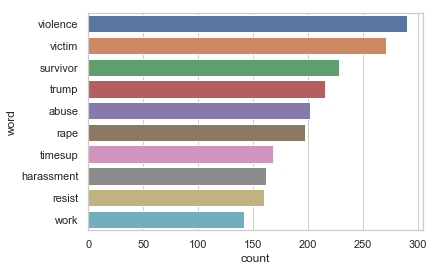

In [230]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="count", y="word", data=top_10_words)

### <font color="maroon"> Word cloud for the entire list of tweets </font>

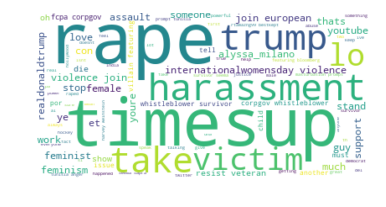

In [237]:
from wordcloud import WordCloud
text = " ".join(i for i in MeToo_tweets_df.Tweet_text)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### <font color="maroon"> Trends of #metoo tweets over the past 7 days </font>

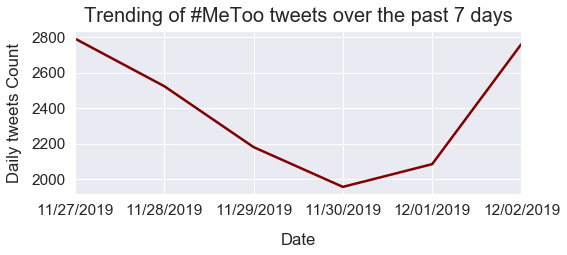

In [286]:
#date Formatting
MeToo_tweets_df['Date']=pd.to_datetime(MeToo_tweets_df.Created_Time).dt.strftime('%m/%d/%Y')
MeToo_tweets_df_counts=MeToo_tweets_df.groupby(['Date']).count().reset_index()

#LineChart
MeToo_tweets_df_counts.set_index('Date')['Tweet_text'].plot(figsize=(8,3), linewidth=2.5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily tweets Count", labelpad=9)
plt.title("Trending of #MeToo tweets over the past 7 days", y=1.02, fontsize=20);

# <font color="blue"> Topic Modelling </font>
###### Topic modeling is a text clustering technique designed to determine categories or topics of text. The modeling technique sifts through all the documents to find matching patterns of terms and groups them together into topics.

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(MeToo_tweets_df['Tweet_text'].values.astype('U'))
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)
topic_values = LDA.transform(doc_term_matrix)
MeToo_tweets_df['topic'] = topic_values.argmax(axis=1)

# <font color="maroon"> Topics and words </font>

In [294]:
for i,topic in enumerate(LDA.components_):
   print(f'Top 10 words for topic #{i}:')
   print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
   print('\n')

Top 10 words for topic #0:
['epstein', 'raped', 'det', 'featuring', 'villain', 'child', 'friend', 'alyssa_milano', 'sondland', 'bloomberg']


Top 10 words for topic #1:
['agirlofherwords', 'die', 'accused', 'da', 'realdonaldtrump', 'victim', 'tunisia', 'male', 'sex', 'work']


Top 10 words for topic #2:
['true', 'hockey', 'oh', 'watch', 'tweet', 'trying', 'harassment', 'victim', 'feminism', 'abuse']


Top 10 words for topic #3:
['corpgov', 'whistleblower', 'et', 'internationalwomensday', 'european', 'veteran', 'resist', 'survivor', 'join', 'violence']


Top 10 words for topic #4:
['rtamazng99', 'bestkept', 'sexually', 'harassment', '16days', 'predator', 'free', 'survivor', 'support', 'victim']




# <font color="blue"> Sentiment Analysis </font>

### <font color="maroon"> Deriving the sentiment for the tweets </font>

In [303]:
Sentiment_data=[]
from textblob import TextBlob 
import re
Tweets_list=MeToo_tweets_df.Tweet_text.tolist()
for i in range(len(Tweets_list)):
    Split_Text=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", Tweets_list[i]).split()
    analysis_text=TextBlob(str(Split_Text))
    if analysis_text.sentiment.polarity > 0: 
        analysis_text='positive'
    elif analysis_text.sentiment.polarity == 0: 
        analysis_text='neutral'
    else: 
        analysis_text='negative'
    Sentiment_data.append([Tweets_list[i],analysis_text])
Sentiment_df=pd.DataFrame(Sentiment_data)
Sentiment_df.columns=['tweet','sentiment']
Sentiment_df.head()

,tweet,sentiment
0,promoting harley quinn animated show harley joker httpstcoolr10dq53g,neutral
1,public school teacher charged abuse student httpstcoivirmzbw2s walkaway maryland,neutral
2,chilean fighting basic powerful chilean httpstcoqrwr1y1bvq,positive
3,camillaengelby allows degraded violation facebook markzuckerberg httpstco5k0opb2uu5,neutral
4,性暴力被害者 の自死者が 三重県 などの身近にいても 110年振りの 刑法改正 でも 先生達と長い目でと話しても 修論はやるのに調整難しい 今日は 津 に現地確認に なんで自分って思う でも行く 自分の人生 httpstcobjvw3shewe,neutral


### <font color="maroon">  Percentage of each sentiment type </font>

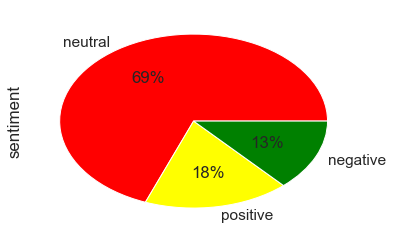

In [307]:
Sentiment_df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
plt.show()